Number of Attributes: 16 + output attribute
# The data is related with direct marketing campaigns of a Portuguese banking institution. 
# The classification goal is to predict if the client will subscribe a term deposit (variable y).
 Input variables:
   bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

 Missing Attribute Values: None


# Data preprocessing

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("bank.csv") 

In [3]:
pwd

'C:\\Users\\iskan'

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


0    5873
1    5289
Name: deposit, dtype: int64


Text(0.5, 1.0, 'target label classes pourcentage')

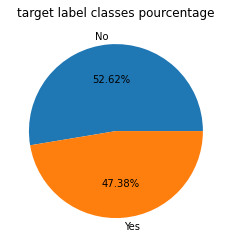

In [107]:
print(data.deposit.value_counts())
plt.pie([5873,5289],labels=['No','Yes'],autopct = "%0.2f%%")
plt.title("target label classes pourcentage")

In [107]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.layers import Dropout
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import metrics

In [6]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [13]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [14]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [4]:
#It is an important part to encode labels in numerical form in order 
#to make sure that the learning algorithm interprets the features correctly

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)


In [5]:
# encodage de la base de donnée via la fonction "MultiColumnLabelEncoder"
data = MultiColumnLabelEncoder(columns = ['job','marital','education', 'default','housing','loan','contact','month','poutcome','deposit']).fit_transform(data)

In [9]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


#### Visualisation des données 

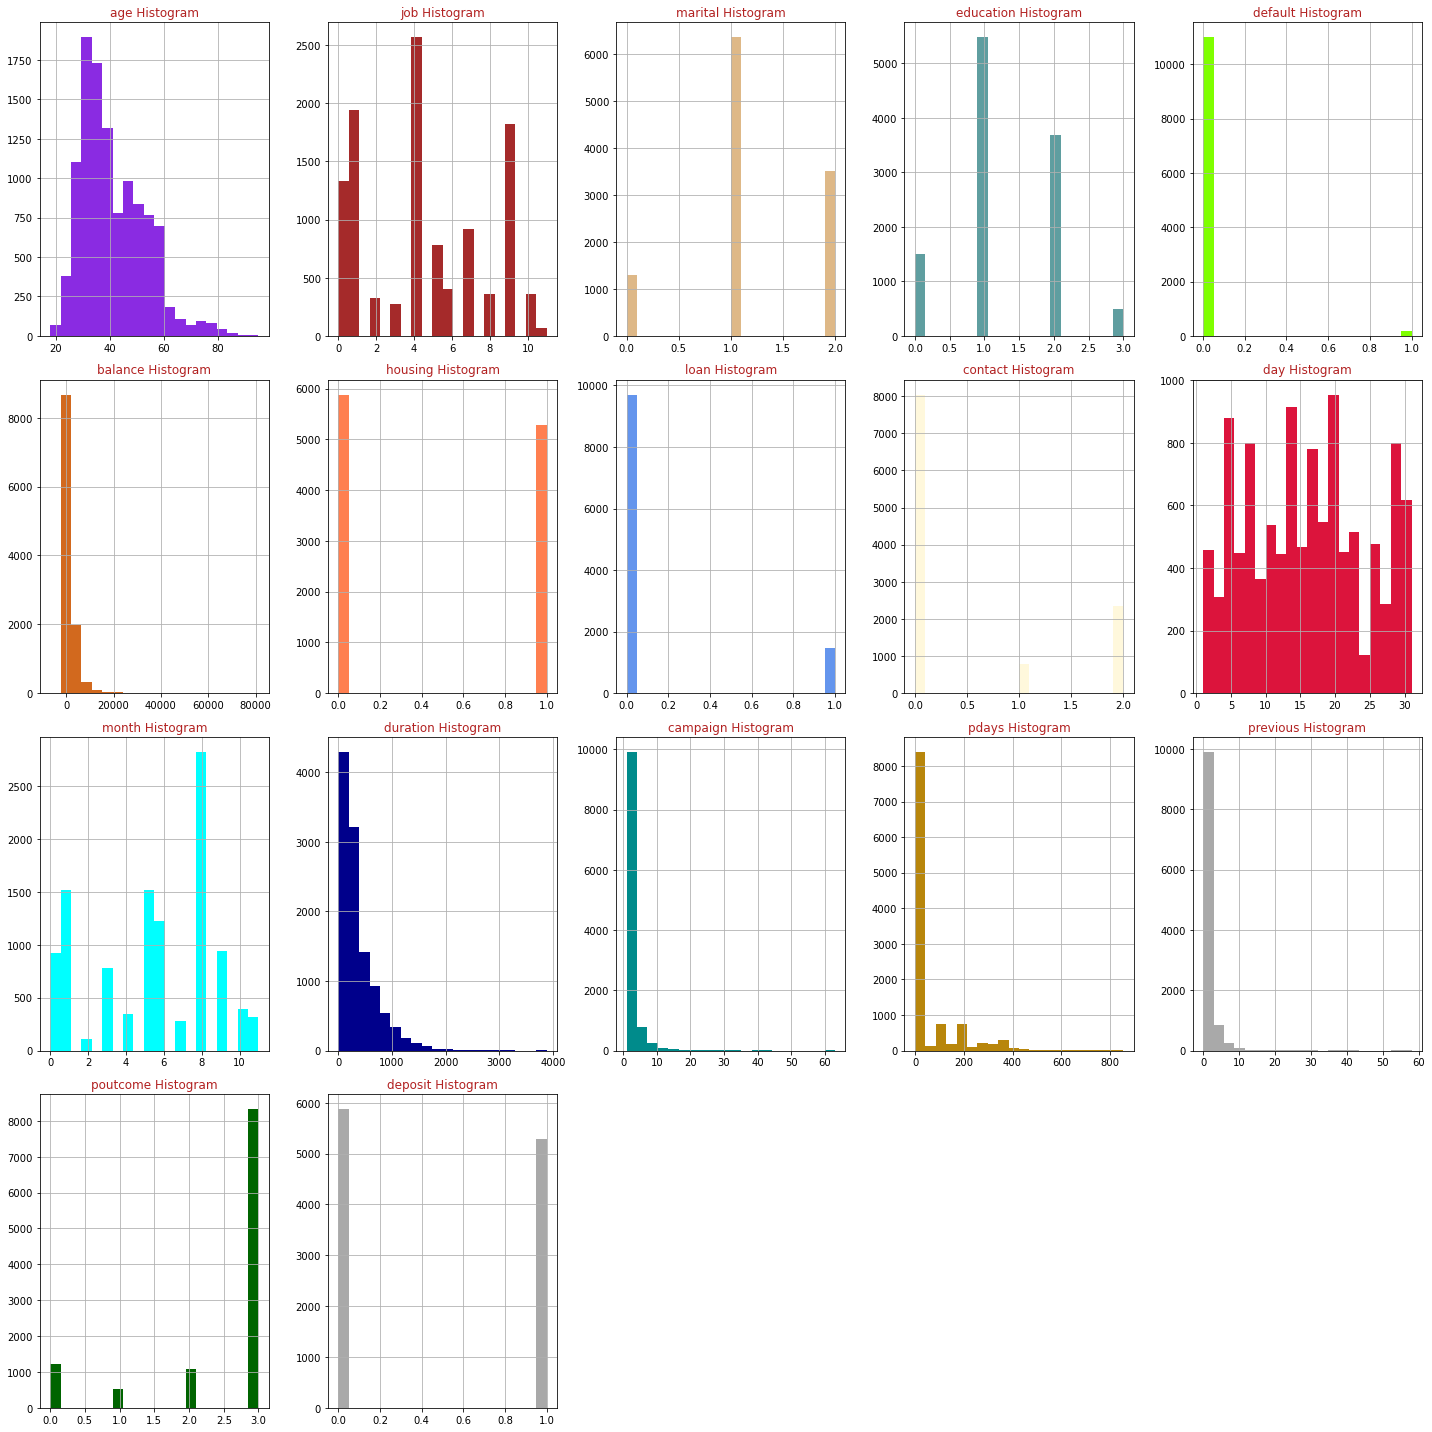

In [114]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    """permet de visualiser tout les features"""
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
    fig.tight_layout() 
    plt.savefig('Histograms.png')
    plt.show()
draw_histograms(data,data.columns,4,5)

In [6]:
#création de df=data pour préserver les données d'origine
df=data
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [7]:
# features are stored in the df X 
X = df.drop('deposit', axis=1)
print(X)
#X

# the target variable is y="deposit"
y=data['deposit']
print(y)

       age  job  marital  education  default  balance  housing  loan  contact  \
0       59    0        1          1        0     2343        1     0        2   
1       56    0        1          1        0       45        0     0        2   
2       41    9        1          1        0     1270        1     0        2   
3       55    7        1          1        0     2476        1     0        2   
4       54    0        1          2        0      184        0     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
11157   33    1        2          0        0        1        1     0        0   
11158   39    7        1          1        0      733        0     0        2   
11159   32    9        2          1        0       29        0     0        0   
11160   43    9        1          1        0        0        0     1        0   
11161   34    9        1          1        0        0        0     0        0   

       day  month  duration

#### Splitting test and train ( 70% , 30% )

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

In [166]:
print("len(X_train)=",len(X_train))
print("len(y_train)=",len(y_train))
#X_train.info()
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))


len(X_train)= 7813
len(y_train)= 7813
(7813, 16)
(7813,)
(3349, 16)
(3349,)


   # Un model séquentiel avec une seule couche cachée et un dropout de 0.5

In [167]:
# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(16,)),
  Dropout(0.5),
  Dense(1, activation='sigmoid')])

In [168]:
import tensorflow
from tensorflow import keras
tensorflow.keras.utils.plot_model(
    model,show_shapes=False, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None
)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [169]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                1088      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [170]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"]) # Configure the model for training

In [172]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test) ,epochs= 150) #training

Epoch 1/150
245/245 [==============================] - 2s 3ms/step - loss: 70.2733 - accuracy: 0.5789 - val_loss: 13.4401 - val_accuracy: 0.6680
Epoch 2/150
245/245 [==============================] - 1s 2ms/step - loss: 25.9450 - accuracy: 0.6396 - val_loss: 3.0854 - val_accuracy: 0.7554
Epoch 3/150
245/245 [==============================] - 1s 2ms/step - loss: 10.7286 - accuracy: 0.6671 - val_loss: 2.9046 - val_accuracy: 0.7322
Epoch 4/150
245/245 [==============================] - 1s 3ms/step - loss: 2.9647 - accuracy: 0.6745 - val_loss: 0.8002 - val_accuracy: 0.7477
Epoch 5/150
245/245 [==============================] - 1s 3ms/step - loss: 1.2432 - accuracy: 0.6721 - val_loss: 1.0832 - val_accuracy: 0.6889
Epoch 6/150
245/245 [==============================] - 1s 2ms/step - loss: 1.0315 - accuracy: 0.6626 - val_loss: 0.9501 - val_accuracy: 0.7101
Epoch 7/150
245/245 [==============================] - 0s 2ms/step - loss: 0.8106 - accuracy: 0.6905 - val_loss: 0.5257 - val_accuracy: 0.

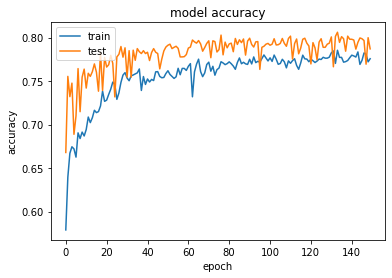

In [173]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Introduction  du Early Stopping


In [174]:
from keras.callbacks import EarlyStopping
# Set callback functions to early stop training 
mycallbacks = [EarlyStopping(monitor='val_loss', patience=5)]

In [177]:
history2 = model.fit(
  X_train, #inputs
  y_train, #target vector
  epochs=150, # number of epochs
  batch_size=32,
  callbacks = mycallbacks, # early stopping
  validation_data=(X_test, y_test))

Epoch 1/150
245/245 [==============================] - 1s 2ms/step - loss: 0.4771 - accuracy: 0.7839 - val_loss: 0.4759 - val_accuracy: 0.7862
Epoch 2/150
245/245 [==============================] - 1s 2ms/step - loss: 0.4829 - accuracy: 0.7804 - val_loss: 0.4749 - val_accuracy: 0.7981
Epoch 3/150
245/245 [==============================] - 1s 3ms/step - loss: 0.4797 - accuracy: 0.7751 - val_loss: 0.4558 - val_accuracy: 0.7937
Epoch 4/150
245/245 [==============================] - 1s 3ms/step - loss: 0.4802 - accuracy: 0.7779 - val_loss: 0.4558 - val_accuracy: 0.7979
Epoch 5/150
245/245 [==============================] - 1s 2ms/step - loss: 0.5036 - accuracy: 0.7810 - val_loss: 0.4852 - val_accuracy: 0.7949
Epoch 6/150
245/245 [==============================] - 1s 3ms/step - loss: 0.4799 - accuracy: 0.7767 - val_loss: 0.4701 - val_accuracy: 0.7769
Epoch 7/150
245/245 [==============================] - 1s 3ms/step - loss: 0.4798 - accuracy: 0.7788 - val_loss: 0.4704 - val_accuracy: 0.7740

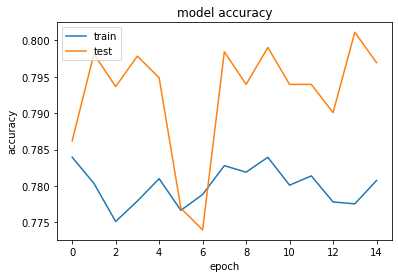

In [178]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

####  On remarque que l'accuracy sur le X_test est légèrement meilleure que celle obtenue sur le X_train !

#  Logistic regression model

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#instantiate the model
log_regression = LogisticRegression(max_iter=10000)

#fit the model using the training data
log_regression.fit(X_train,y_train)

#use model to make predictions on test data
y_pred = log_regression.predict(X_test)



In [17]:
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))


The Accuracy for Test Set is 78.82950134368468


In [188]:
#Les coefficients sont :
print(log_regression.coef_)
print(log_regression.intercept_)

[[ 2.15553077e-03  5.65387547e-03  1.75182233e-02  1.67080327e-01
  -1.71417043e-01  3.61022135e-05 -1.11483471e+00 -1.14046578e+00
  -6.80317118e-01 -9.09698745e-03  4.33138384e-02  4.98237300e-03
  -1.49431205e-01  2.37280597e-03  9.01042020e-02  1.99751638e-02]]
[-1.25616363]


## Même modèle mais avec la significativité des coefficients

In [158]:
import statsmodels.api as sm

In [18]:
logreg = LogisticRegression(max_iter=10000).fit(X_train,y_train)
logreg

print("Training set score: {:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test,y_test)))

import statsmodels.api as sm
logit_model=sm.Logit(y,X,)
result=logit_model.fit()
print(result.summary())

Training set score: 0.797
Test set score: 0.788
Optimization terminated successfully.
         Current function value: 0.474476
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                deposit   No. Observations:                11162
Model:                          Logit   Df Residuals:                    11146
Method:                           MLE   Df Model:                           15
Date:                Tue, 14 Dec 2021   Pseudo R-squ.:                  0.3141
Time:                        23:48:05   Log-Likelihood:                -5296.1
converged:                       True   LL-Null:                       -7721.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0091      0.002     -5.149      0.000      

## Matrice de confusion

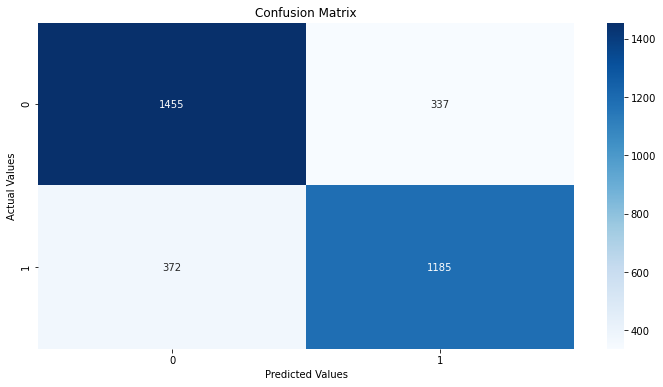

In [19]:
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

## Courbe de ROC 

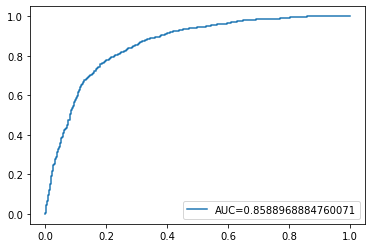

In [20]:
#we can plot the ROC  Curve which displays the percentage of true positives predicted 
#by the model as the prediction probability cutoff is lowered from 1 to 0.

#The higher the AUC (area under the curve), the more accurately our model is able to predict outcomes:

#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

# Decision Tree
 ### 1- Choix manuel des hyperparamètres
 ### 2- GridSearch pour le choix des hyperparamètres

In [108]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Decision tree with depth = 2 #criterion : gini
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
dt2.fit(X_train, y_train)
dt2_score_train = dt2.score(X_train, y_train)
print("Training score: ",dt2_score_train)
dt2_score_test = dt2.score(X_test, y_test)
print("Testing score: ",dt2_score_test)

Training score:  0.7120184308204275
Testing score:  0.7094655120931621


In [11]:
# Decision tree with depth = 3
dt3 = tree.DecisionTreeClassifier(random_state=1, max_depth=3)
dt3.fit(X_train, y_train)
dt3_score_train = dt3.score(X_train, y_train)
print("Training score: ",dt3_score_train)
dt3_score_test = dt3.score(X_test, y_test)
print("Testing score: ",dt3_score_test)

Training score:  0.7785575630879499
Testing score:  0.7758118701007839


In [12]:
# Decision tree with depth = 4
dt4 = tree.DecisionTreeClassifier(random_state=1, max_depth=4)
dt4.fit(X_train, y_train)
dt4_score_train = dt4.score(X_train, y_train)
print("Training score: ",dt4_score_train)
dt4_score_test = dt4.score(X_test, y_test)
print("Testing score: ",dt4_score_test)

Training score:  0.7982678811408093
Testing score:  0.7829787234042553


In [13]:
# Decision tree with depth = 5
dt5 = tree.DecisionTreeClassifier(random_state=1, max_depth=5)
dt5.fit(X_train, y_train)
dt5_score_train = dt5.score(X_train, y_train)
print("Training score: ",dt5_score_train)
dt5_score_test = dt5.score(X_test, y_test)
print("Testing score: ",dt5_score_test)

Training score:  0.817231596237121
Testing score:  0.8051511758118701


In [14]:
# Decision tree with depth = 6
dt6 = tree.DecisionTreeClassifier(random_state=1, max_depth=6)
dt6.fit(X_train, y_train)
dt6_score_train = dt6.score(X_train, y_train)
print("Training score: ",dt6_score_train)
dt6_score_test = dt6.score(X_test, y_test)
print("Testing score: ",dt6_score_test)

Training score:  0.8246976258025982
Testing score:  0.8123180291153416


In [16]:
# Decision tree with depth = 7
dt7 = tree.DecisionTreeClassifier(random_state=1, max_depth=7)
dt7.fit(X_train, y_train)
dt7_score_train = dt7.score(X_train, y_train)
print("Training score: ",dt7_score_train)
dt7_score_test = dt7.score(X_test, y_test)
print("Testing score: ",dt7_score_test)

Training score:  0.8447065850380767
Testing score:  0.8087346024636058


In [29]:
# Decision tree with depth = 8
dt8 = tree.DecisionTreeClassifier(random_state=1, max_depth=8)
dt8.fit(X_train, y_train)
dt8_score_train = dt8.score(X_train, y_train)
print("Training score: ",dt8_score_train)
dt8_score_test = dt8.score(X_test, y_test)
print("Testing score: ",dt8_score_test)

Training score:  0.8620277736299836
Testing score:  0.8096304591265397


faisons la comparaison des scores de Train et test pour les Depths d'arbres différents

In [20]:
print('{:10} {:20} {:20}'.format('Tree depth', ' Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------','---------------'))
print('{:1} {:>25} {:>20}'.format(2, dt2_score_train, dt2_score_test))
print('{:1} {:>25} {:>20}'.format(3, dt3_score_train, dt3_score_test))
print('{:1} {:>25} {:>20}'.format(4, dt4_score_train, dt4_score_test))
print('{:1} {:>25} {:>20}'.format(6, dt6_score_train, dt6_score_test))
print('{:1} {:>25} {:>20}'.format(7, dt7_score_train, dt7_score_test))
print('{:1} {:>25} {:>20}'.format(8, dt8_score_train, dt8_score_test))

Tree depth  Training score      Testing score       
-----      --------------       ---------------     
2        0.7113632969986561   0.7110862262038073
3        0.7785575630879499   0.7758118701007839
4        0.7982678811408093   0.7829787234042553
6        0.8246976258025982   0.8123180291153416
7        0.8447065850380767   0.8087346024636058
8        0.8620277736299836   0.8096304591265397


D'après les observations ci-dessous, un arbre avec une profondeur de 6 semble plus raisonnable car les résultats à la formation et aux tests sont raisonnablement élevés

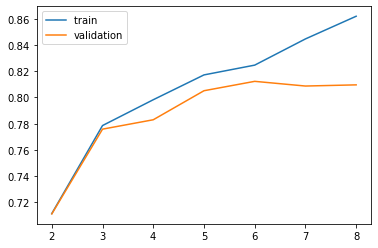

In [59]:
mm=[2,3,4,5,6,7,8]
ii=[dt2_score_train,dt3_score_train,dt4_score_train,dt5_score_train,dt6_score_train,dt7_score_train,dt8_score_train]
nn=[dt2_score_test,dt3_score_test,dt4_score_test,dt5_score_test,dt6_score_test,dt7_score_test,dt8_score_test]
plt.plot(mm,ii,label="train ")
plt.plot(mm,nn,label ="validation")
plt.legend()

[Text(2746.40625, 2523.8571428571427, 'duration <= 206.5\ngini = 0.499\nsamples = 6697\nvalue = [3497, 3200]\nclass = yes deposit'),
 Text(1428.5336538461538, 2135.5714285714284, 'pdays <= 17.0\ngini = 0.331\nsamples = 2690\nvalue = [2127, 563]\nclass = yes deposit'),
 Text(737.7403846153846, 1747.2857142857142, 'month <= 9.5\ngini = 0.241\nsamples = 2123\nvalue = [1825, 298]\nclass = yes deposit'),
 Text(429.2307692307692, 1359.0, 'month <= 0.5\ngini = 0.217\nsamples = 2055\nvalue = [1801, 254]\nclass = yes deposit'),
 Text(214.6153846153846, 970.7142857142858, 'housing <= 0.5\ngini = 0.499\nsamples = 116\nvalue = [60, 56]\nclass = yes deposit'),
 Text(107.3076923076923, 582.4285714285716, 'day <= 28.0\ngini = 0.401\nsamples = 72\nvalue = [20, 52]\nclass = no deposit'),
 Text(53.65384615384615, 194.14285714285734, 'gini = 0.324\nsamples = 64\nvalue = [13, 51]\nclass = no deposit'),
 Text(160.96153846153845, 194.14285714285734, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]\nclass = yes de

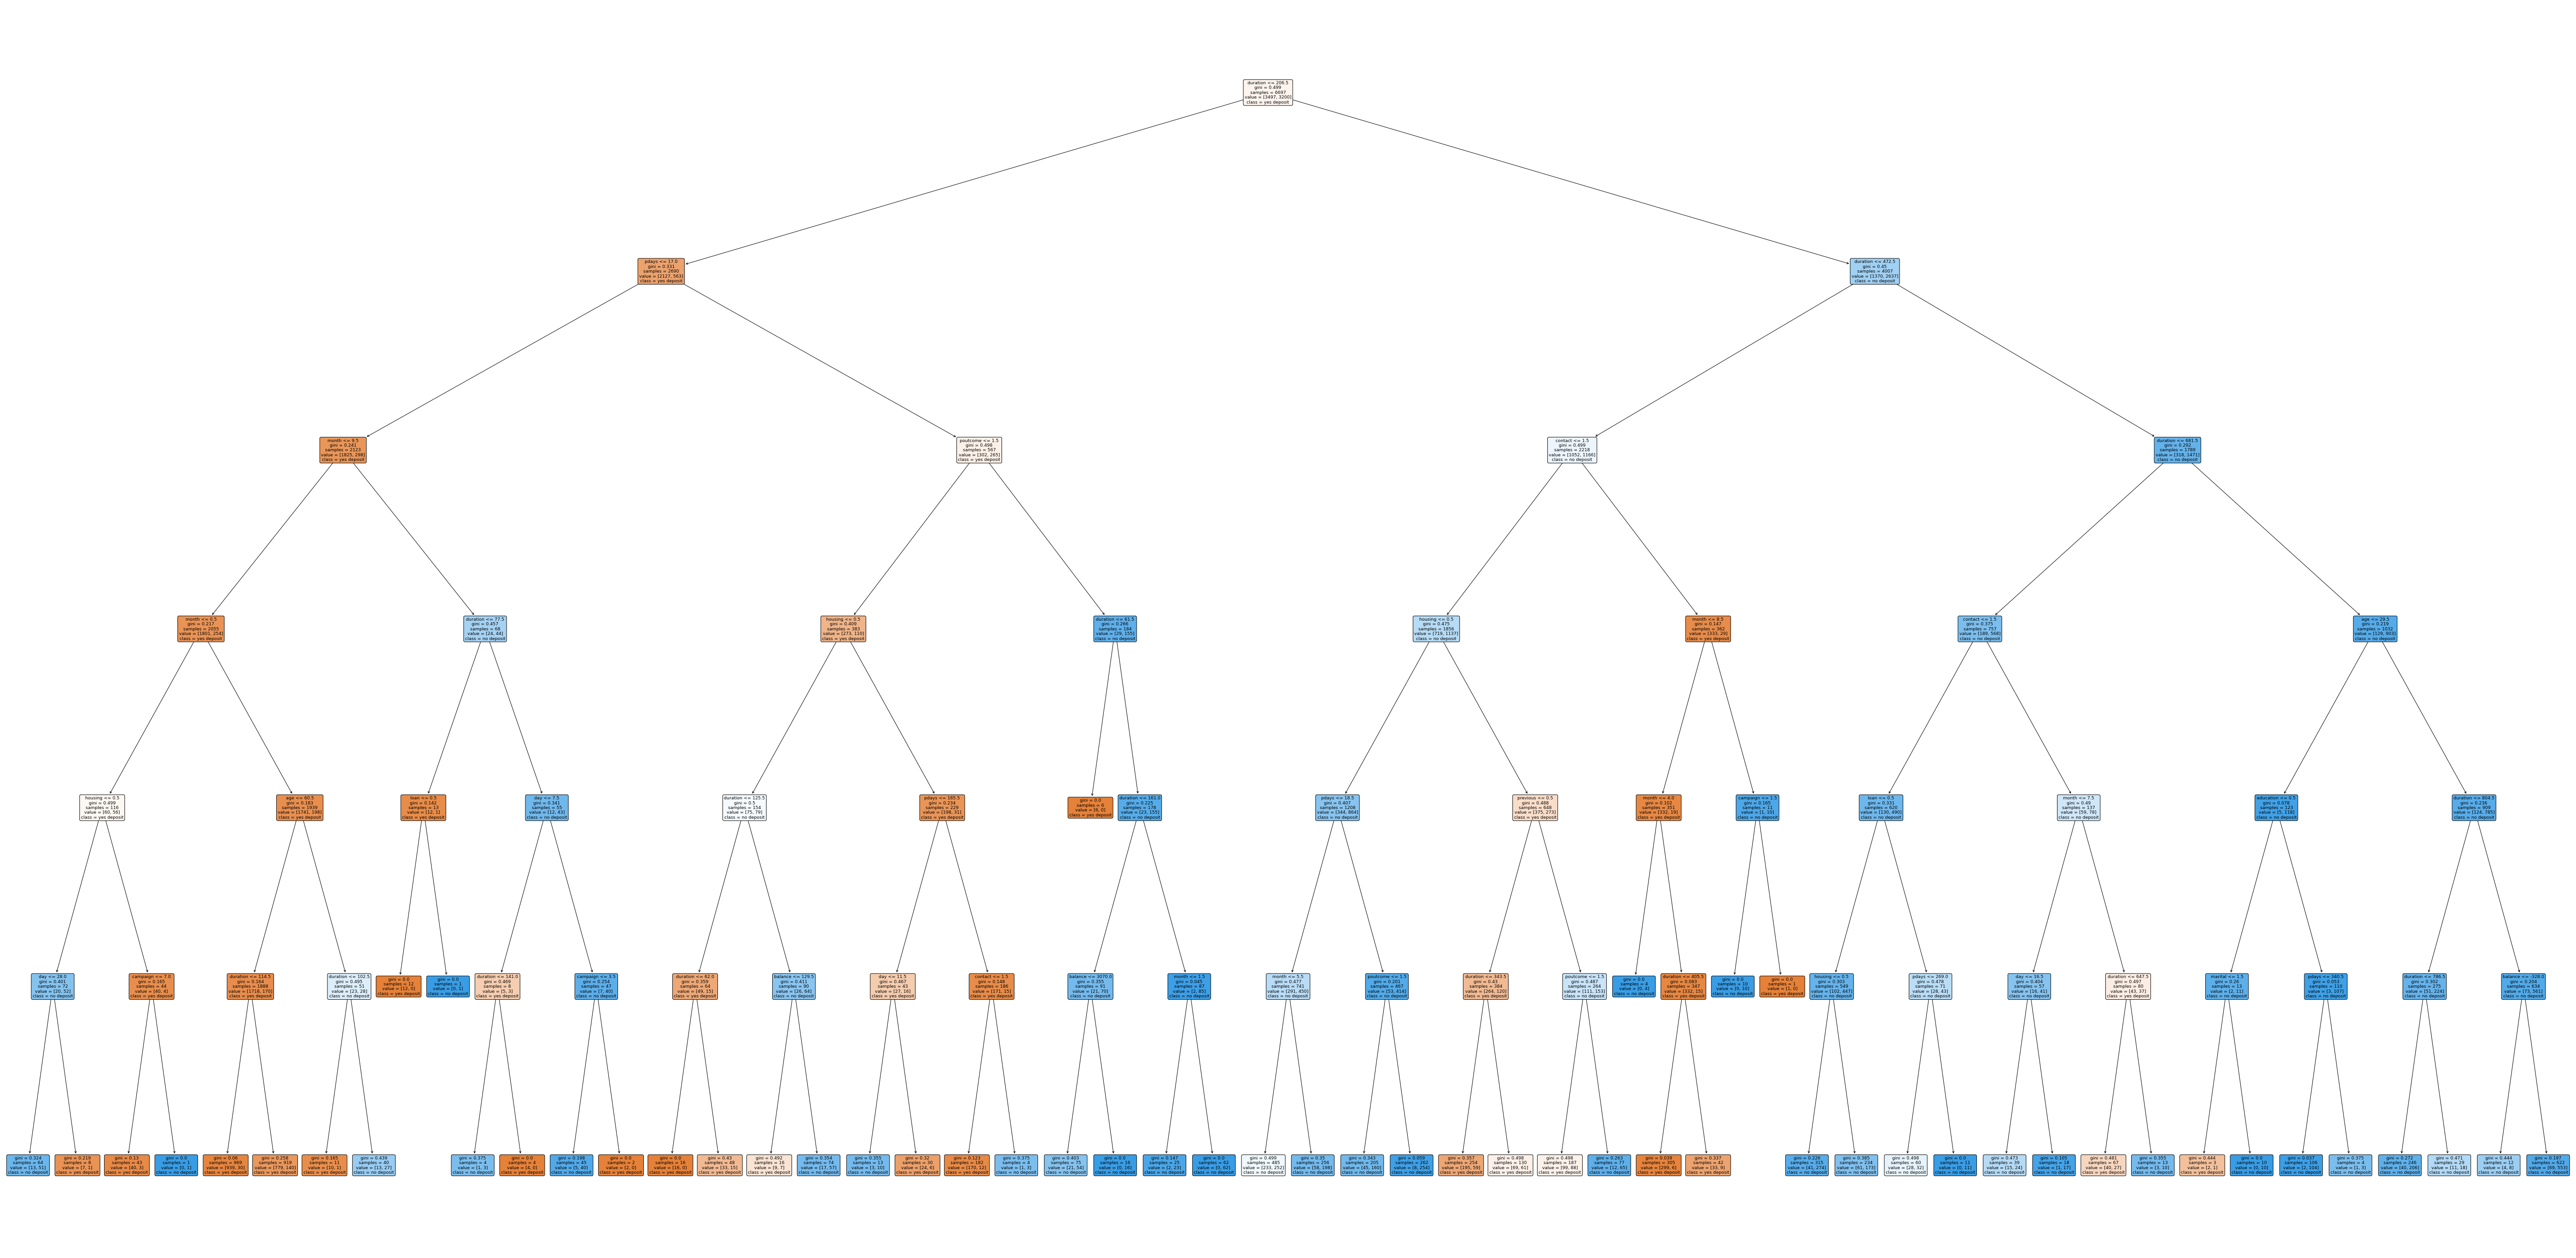

In [62]:
#plot du meilleur Arbre (max_depth=6, criterion :gini)
plt.figure(figsize=(100,50))
plot_tree(dt6,filled=True,rounded=True,
          class_names=["yes deposit","no deposit"],
          feature_names=X.columns)
            

### Grid_search

In [ ]:
#setting parameters 
param_dist={
    "criterion":["gini","entropy"],
    "max_depth":[2,3,4,5,6,7,8,9,None]
}

In [35]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [61]:
grid=GridSearchCV(dt,param_grid=param_dist,cv=10,n_jobs=-1) #cv :cross_validation

In [37]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, None]})

In [42]:
print(grid.best_estimator_)
print(grid.best_score_)
print(grid.best_params_)

DecisionTreeClassifier(criterion='entropy', max_depth=7)
0.8176788702228766
{'criterion': 'entropy', 'max_depth': 7}


In [45]:
grid.fit(X_test,y_test)
print(grid.best_score_)

0.8062795317061425


In [ ]:
cm2=confusion_matrix(y_test,pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm2, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

D'après le GridSearch l'arbre optimal est d'un width=7 fait avec le critère "entropy"
avec un Train_accuracy=0.81  et un Test_accuracy=0.80

# Random forest ( with GridSearch )

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rfc=RandomForestClassifier(random_state=42)

In [92]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [93]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [94]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [95]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='entropy')

In [96]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=200,
                       random_state=42)

In [97]:
pred=rfc1.predict(X_test)

In [98]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.8423409973126307


Text(0.5, 33.0, 'Predicted Values')

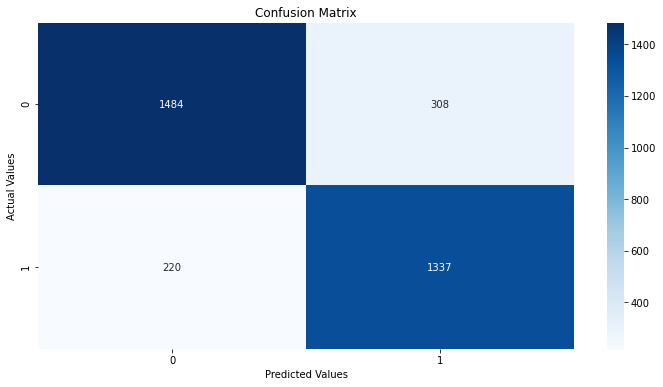

In [99]:
cm3=confusion_matrix(y_test,pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm3, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

Text(0.5, 1.0, 'Models accuracies')

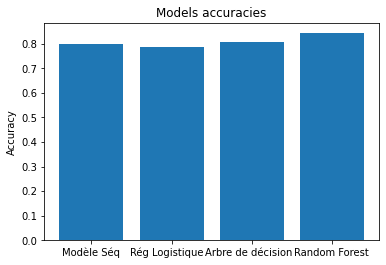

In [101]:
# comparaison des 4 modèles vis à vis de l'accuracy
modèles=["Modèle Séq","Rég Logistique ","Arbre de décision","Random Forest"]
Test_Accuracies=[0.7970,0.788,0.8062,0.8423]
plt.bar(modèles,Test_Accuracies)
plt.ylabel("Accuracy")
plt.title("Models accuracies")